In [35]:
import speech_recognition as sr

recognizer = sr.Recognizer()

harvard = sr.AudioFile('data/LA_card_number.wav')
with harvard as source:
    audio = recognizer.record(source)
    
recognizer.recognize_google(audio)

In [43]:
import os

In [46]:
def ocr_get_text(img_path, doc_id='0'):
    OCR_SH_PATH  = 'text_recogn/ocr_sdk.sh'
    OCR_LANG = 'English'
    OCR_TXT_DPATH = 'text_recogn'
    OCR_TXT_PATH = os.path.join(OCR_TXT_DPATH, doc_id + '.txt')

    if not os.path.exists(img_path):
        return ""
    if os.system('bash %s %s %s -l %s -f txt' % (OCR_SH_PATH, img_path, OCR_TXT_PATH, OCR_LANG)) != 0:
        return ""
    with open(OCR_TXT_PATH, 'r') as recognized:
        return recognized.read()


In [49]:
ocr_get_text('text_recogn/kk.jpg')

'\ufeff'

In [189]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
import random
%matplotlib inline

In [203]:
data = get_data('2nd_task_data/DataLocation2/IHearVoicesData/Audio/device1_channel1_20181013172137.wav')

In [253]:
rate = 44100

def get_data(name):
    rate, data = wav.read(name)
    return (np.array(data) / 2 ** 16.) * 2

def get_fft(data, seconds=0.1, start=0):
    duration = int(seconds * rate)
    start = int(rate * start)
    cropped_data = data[start:start + duration]

    c = fft(cropped_data) # calculate fourier transform (complex numbers list)
    d = int(len(c) / 2)  # you only need half of the fft list (real signal symmetry)
    return abs(c[:d - 1])

def filter_fft(data, wsize=200):
    ret = []
    ind = []
    for i in range(len(data)):
        lb = max(0, i - wsize)
        lr = min(len(data) - 1, i + wsize)
        if data[i] > data[lb:lr].mean() * 5 and data[i] == max(data[lb:lr]):
            ret.append(data[i])
            ind.append(i)
        else:
            ret.append(0)
    return ret, ind
        

def draw_fft(data):
    plt.figure(figsize=(20, 10))
    plt.plot(data) 
    plt.show()

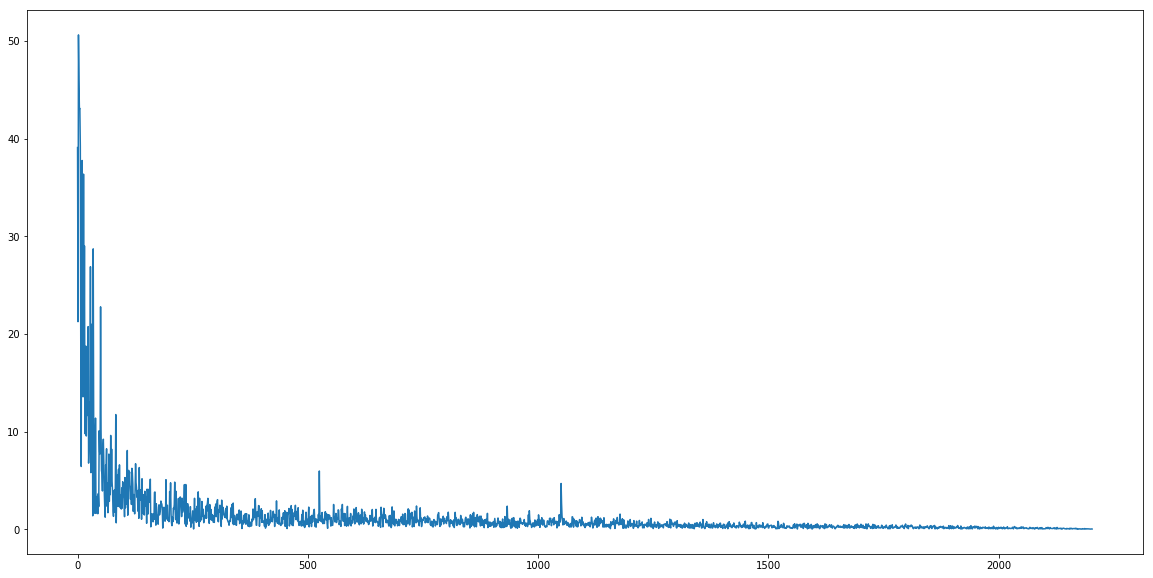

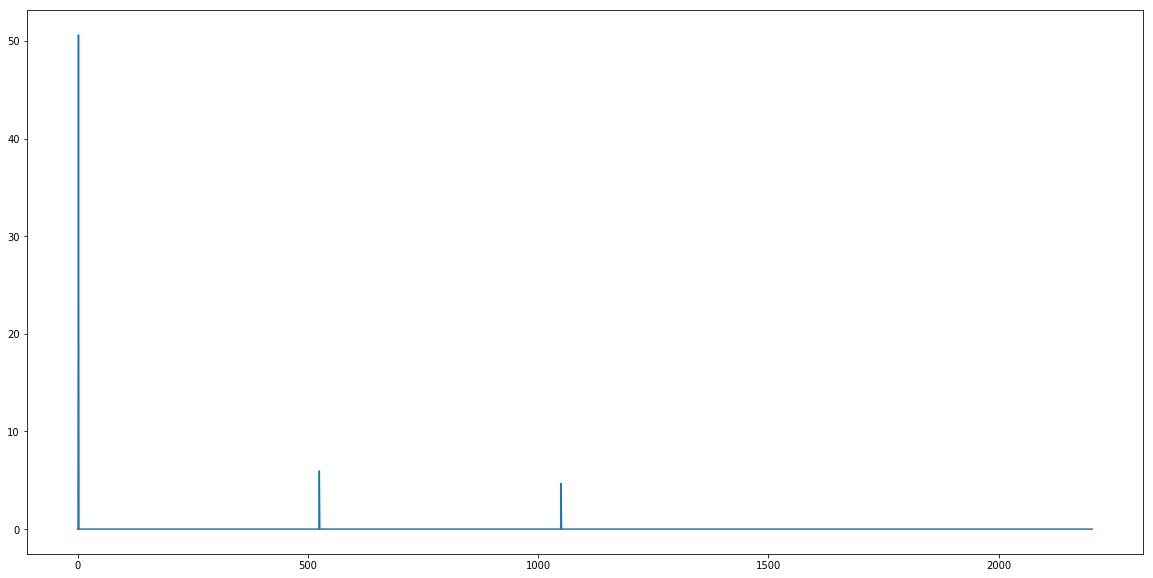

In [254]:
data = get_data('2nd_task_data/DataLocation2/IHearVoicesData/Audio/device1_channel1_20181013172137.wav')
ft = get_fft(data, start=500)
draw_fft(ft)
ft, _ = filter_fft(ft)
draw_fft(ft)

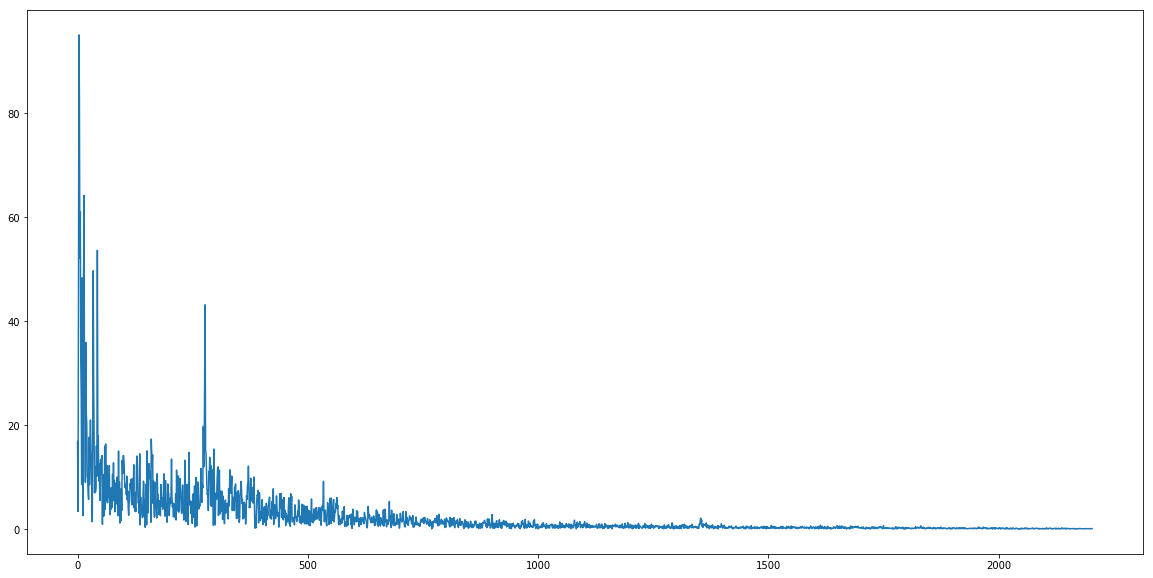

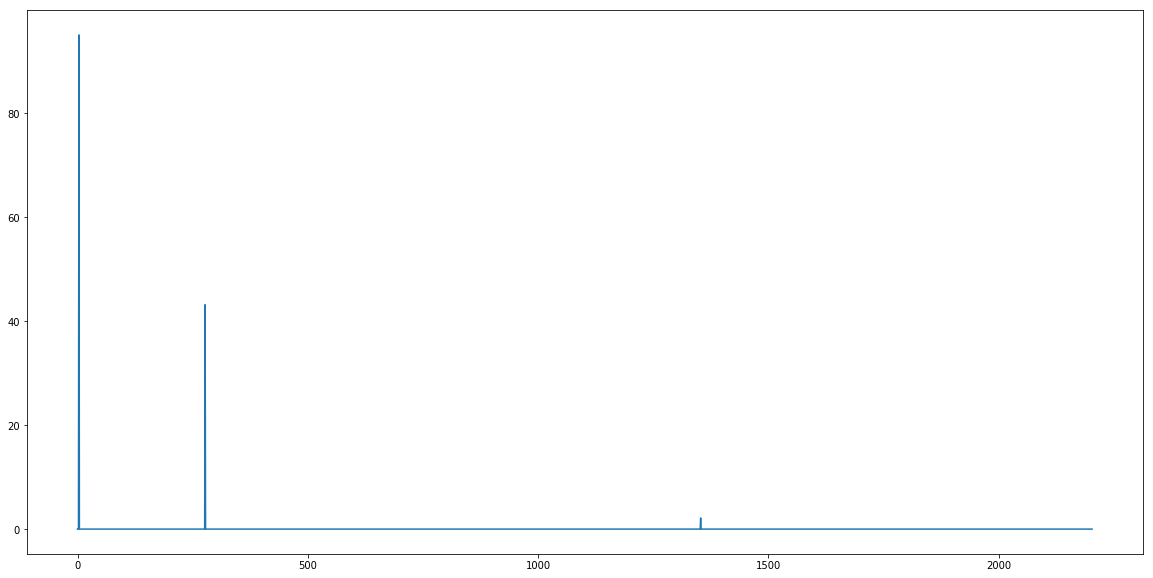

In [680]:
data = get_data('2nd_task_data/DataLocation2/IHearVoicesData/Audio/device1_channel1_20181023090834.wav')
ft = get_fft(data, start=500)
draw_fft(ft)
ft, _ = filter_fft(ft)
draw_fft(ft)

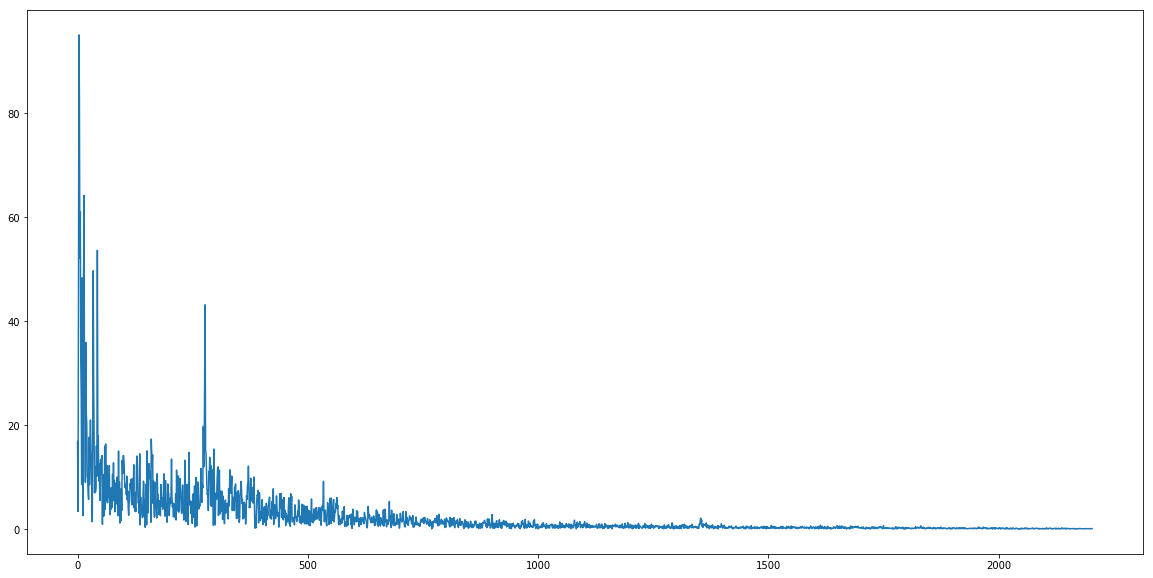

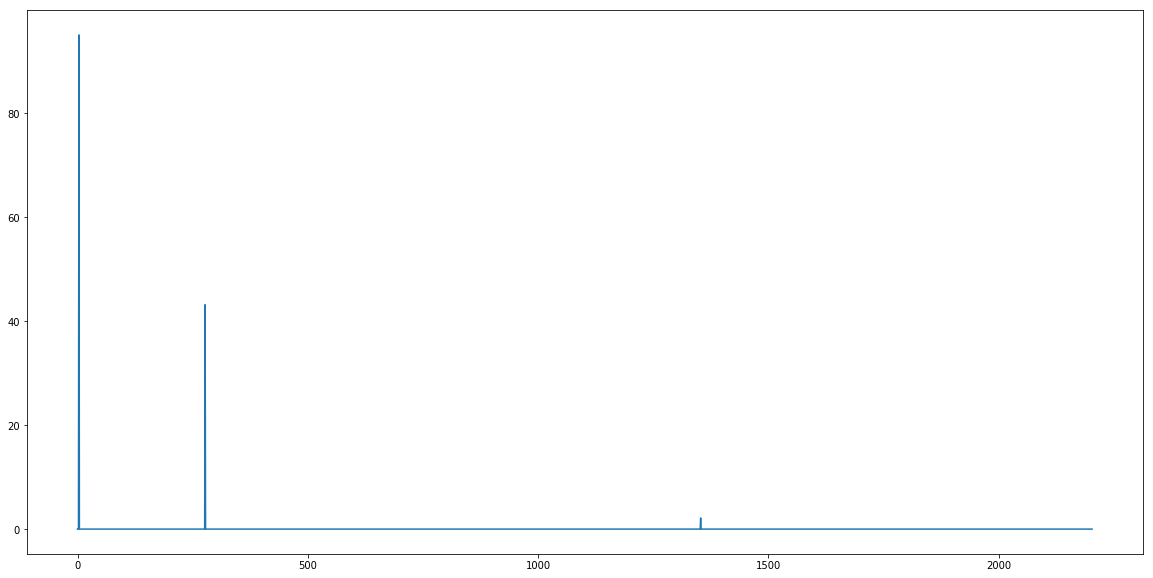

In [681]:
data = get_data('2nd_task_data/DataLocation2/IHearVoicesData/Audio/device1_channel1_20181023090834.wav')
ft = get_fft(data, start=500)
draw_fft(ft)
ft, _ = filter_fft(ft)
draw_fft(ft)

In [295]:
def get_features_for_file(name):
    data = get_data(name)
    for i in range(0, int(len(data) / rate), 3):
        ft, ind = filter_fft(get_fft(data, start=i))
        yield ind

In [296]:
features = get_features_for_file('2nd_task_data/DataLocation2/IHearVoicesData/Audio/device1_channel1_20181013172137.wav')

In [297]:
%%time
features = list(features)

CPU times: user 5.19 s, sys: 193 ms, total: 5.38 s
Wall time: 4.95 s


In [298]:
from os import listdir
from tqdm import tqdm_notebook as tqdm
from os.path import isfile, join

mypath = '2nd_task_data/DataLocation2/IHearVoicesData/Audio/'
onlyfiles = [join(mypath, f) for f in listdir(mypath) if isfile(join(mypath, f)) and f[-3:] == 'wav']

In [299]:
onlyfiles

['2nd_task_data/DataLocation2/IHearVoicesData/Audio/device1_channel1_20181025072606.wav',
 '2nd_task_data/DataLocation2/IHearVoicesData/Audio/device1_channel1_20181021012411.wav',
 '2nd_task_data/DataLocation2/IHearVoicesData/Audio/device1_channel1_20181026105445.wav',
 '2nd_task_data/DataLocation2/IHearVoicesData/Audio/device1_channel1_20181020205940.wav',
 '2nd_task_data/DataLocation2/IHearVoicesData/Audio/device1_channel1_20181025175425.wav',
 '2nd_task_data/DataLocation2/IHearVoicesData/Audio/device1_channel1_20181024131012.wav',
 '2nd_task_data/DataLocation2/IHearVoicesData/Audio/device1_channel1_20181022073805.wav',
 '2nd_task_data/DataLocation2/IHearVoicesData/Audio/device1_channel1_20181014183321.wav',
 '2nd_task_data/DataLocation2/IHearVoicesData/Audio/device1_channel1_20181012170641.wav',
 '2nd_task_data/DataLocation2/IHearVoicesData/Audio/device1_channel1_20181023044402.wav',
 '2nd_task_data/DataLocation2/IHearVoicesData/Audio/device1_channel1_20181012124210.wav',
 '2nd_task

In [300]:
dct = {}
for file in tqdm(onlyfiles):
    dct[file] = list(get_features_for_file(file))

A Jupyter Widget

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/Users/artemlukoyanov/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/artemlukoyanov/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/artemlukoyanov/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



In [304]:
import json
with open('fft_peaks.json', 'w') as fp:
    json.dump(dct, fp)

In [305]:
import pandas as pd
import json

In [632]:
def read_fearutes(filename):
    with open(filename) as f:
        data = json.load(f)
    df = pd.DataFrame()
    df['datest'] = [i['timestamp'] for i in data['data']]
    df['event'] = [i['event']['variable'] for i in data['data']]
    df['vals']  = [np.array([float(j) if j != 'Infinity' else 1000 for j in i['event']['content'] ]) for i in data['data']]
    return df

In [633]:
df = read_fearutes('2nd_task_data/DataLocation2/IHearVoicesData/Motion/20181012_1200.json')

In [357]:
print(df['event'].unique())

['NGIMU-PEPA.quaternion' 'NGIMU-PEPA.acceleration' 'NGIMU-SALT.quaternion'
 'NGIMU-SALT.acceleration' 'NGIMU-PEPA.battery' 'NGIMU-SALT.battery']


In [515]:
ind = np.array(df[df['event'] == 'NGIMU-PEPA.battery'].index)
print(ind)
print(np.unique(ind[1:] - ind[:-1]))

[    97    299    501 ... 724827 725029 725229]
[179 180 183 187 188 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 381 382 389 393 398 399 590]


In [527]:
def normilize_features(df_e):
    df = df_e.copy()
    ind = np.array(df[df['event'] == 'NGIMU-PEPA.battery'].index)

    df['block_num'] = [np.searchsorted(ind, i) for i in df.index]

    ndf = df.groupby(by=['block_num', 'event']).apply(lambda x: x.iloc[:].min()))#lambda x: x['vals'].min())
    return ndf

SyntaxError: invalid syntax (<ipython-input-527-ae38101bb784>, line 7)

In [519]:
for event in ['NGIMU-PEPA.quaternion', 'NGIMU-SALT.quaternion']:
            sdf[sdf['event'] == event]['content']
            rdf[name + '_mean'] = arr.mean()
            rdf[name + '_max'] = arr.max()
            rdf[name + '_min'] = arr.min()
            rdf[name + '_std'] = arr.std()

NameError: name 'sdf' is not defined

In [402]:
a = np.array([1, 4])
b = np.array([3, 2])

c = np.array([a, b])

c.min(axis=0)

array([1, 2])

,datest,event,vals
0,1539345600007,NGIMU-PEPA.quaternion,"[-0.4854156970977783, 0.5118122100830078, -0.4..."
1,1539345600007,NGIMU-PEPA.acceleration,"[0.9791125059127808, -0.010091425850987434, -0..."
2,1539345600011,NGIMU-SALT.quaternion,"[0.43619057536125183, -0.5737253427505493, 0.3..."
3,1539345600011,NGIMU-SALT.acceleration,"[0.9391694664955139, 0.052056197077035904, 0.0..."
4,1539345600021,NGIMU-PEPA.quaternion,"[-0.48526686429977417, 0.5119546055793762, -0...."


In [649]:
def show_feature(name, size=4):
    plt.figure(figsize=(20, 10))

    ax0 = plt.subplot(221)        
    ax0.plot(df[df['event'] == name]['vals'].apply(lambda x: x[size - 4]))
    ax0.set_title('0')

    ax1 = plt.subplot(222)
    ax1.plot(df[df['event'] == name]['vals'].apply(lambda x: x[size - 3]))
    ax1.set_title('1')

    ax2 = plt.subplot(223)
    ax2.plot(df[df['event'] == name]['vals'].apply(lambda x: x[size - 2]))
    ax2.set_title('2')

    ax3 = plt.subplot(224)
    ax3.plot(df[df['event'] == name]['vals'].apply(lambda x: x[size - 1]))
    ax3.set_title('3')

    plt.show()

NGIMU-PEPA.quaternion


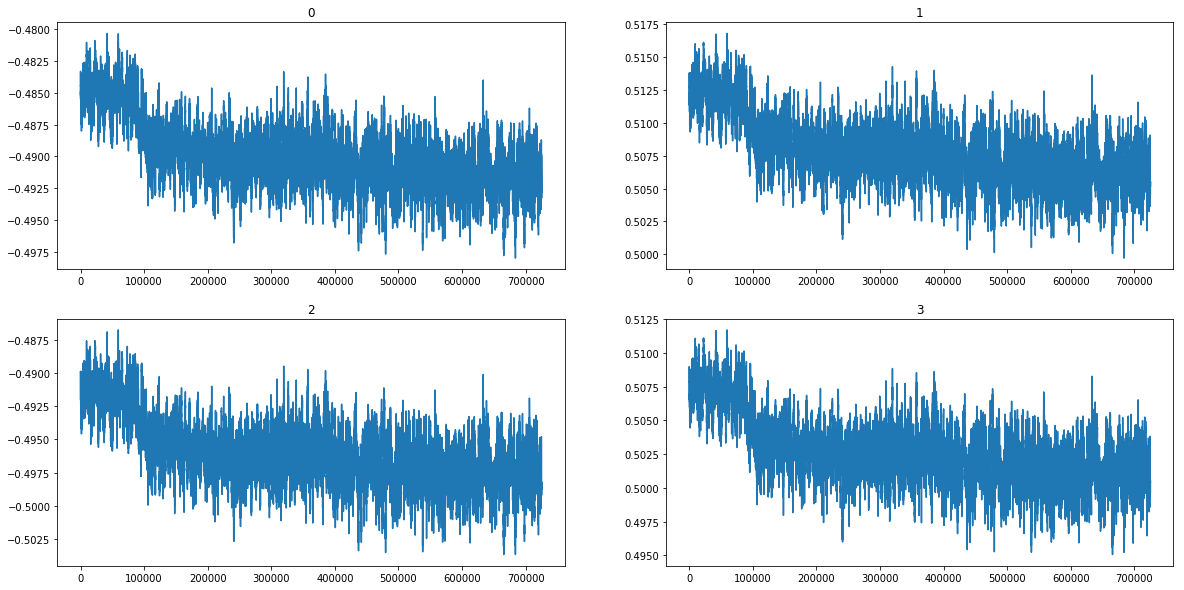

NGIMU-SALT.quaternion


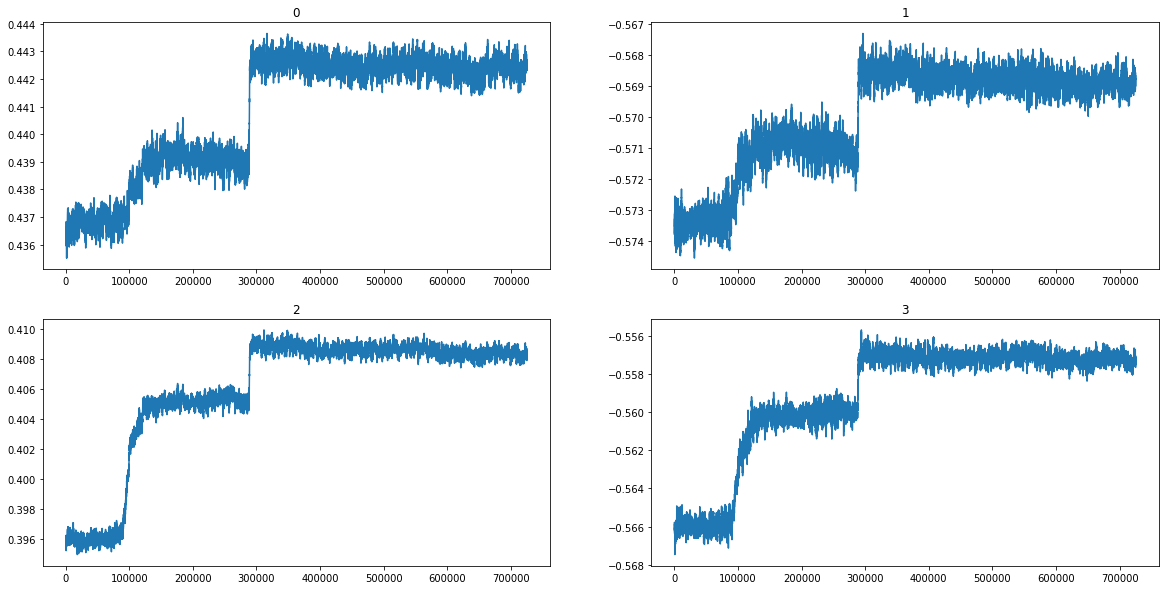

NGIMU-PEPA.acceleration


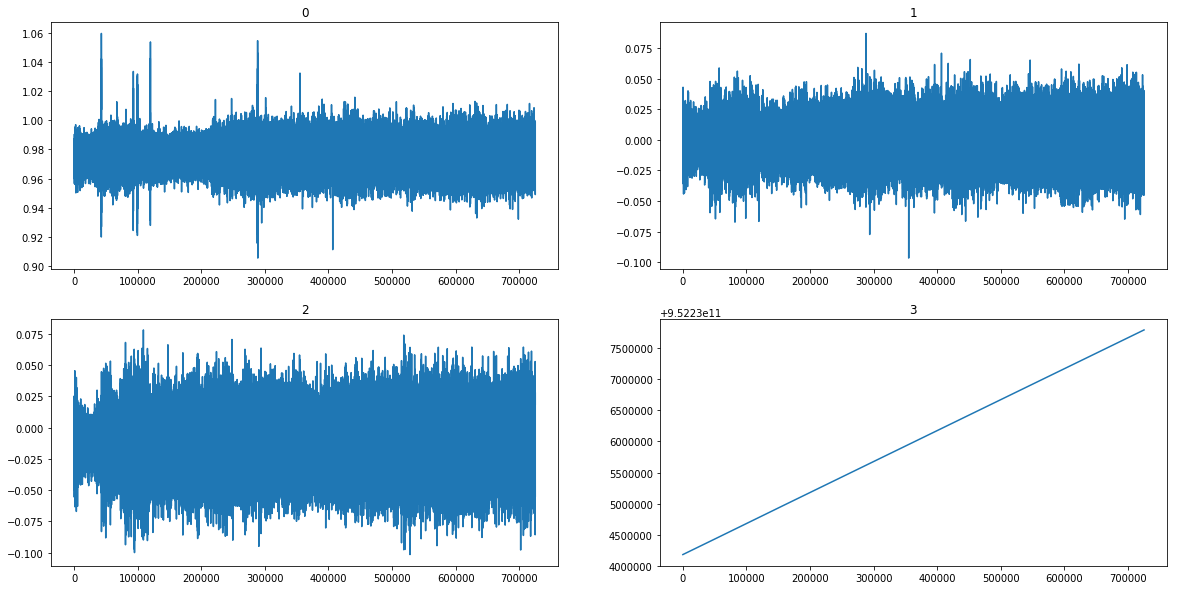

NGIMU-SALT.acceleration


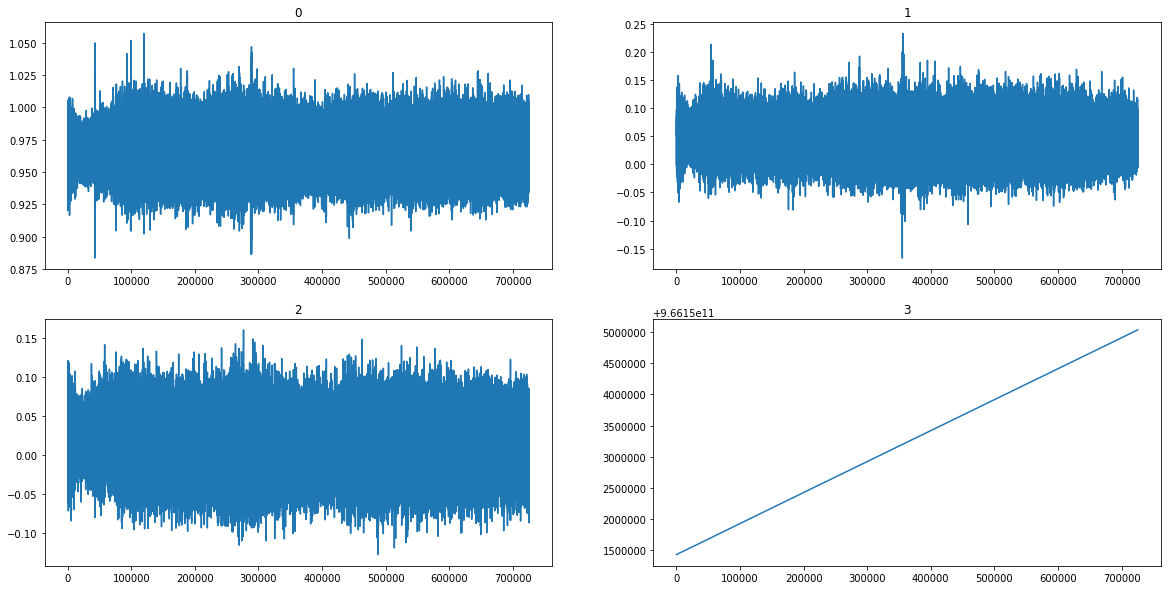

NGIMU-PEPA.battery


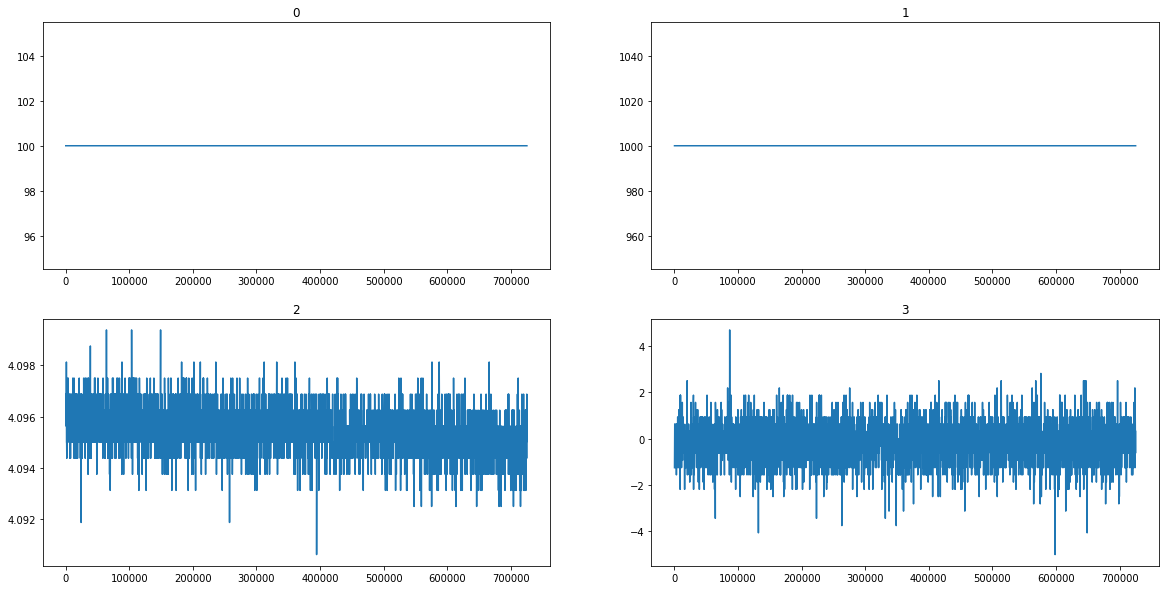

NGIMU-SALT.battery


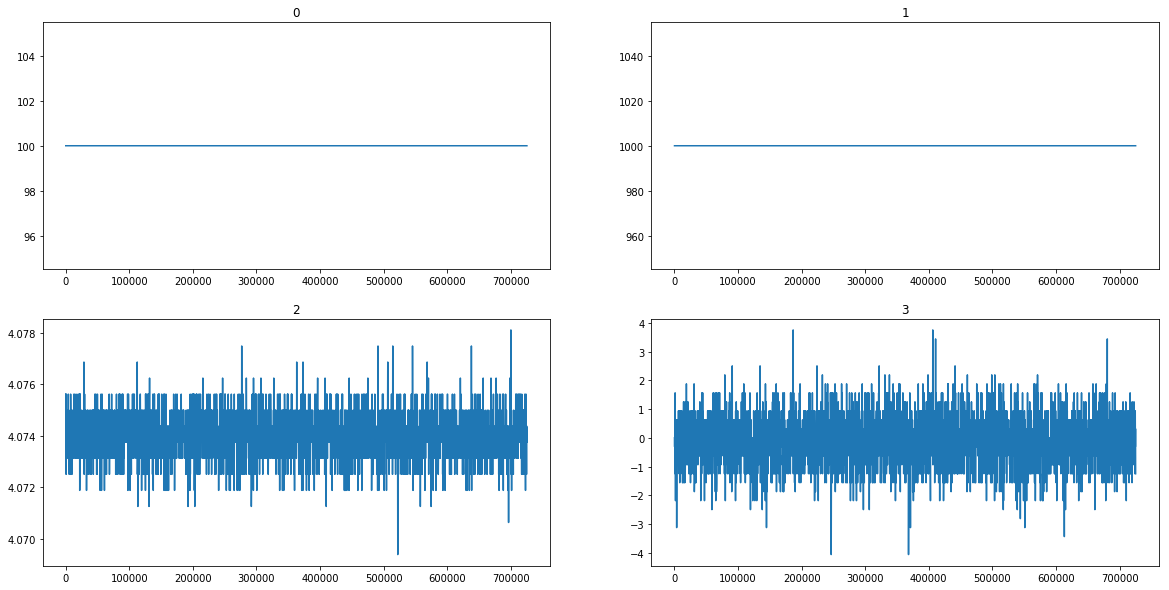

In [671]:
df = read_fearutes('2nd_task_data/DataLocation2/IHearVoicesData/Motion/20181012_1200.json')

print('NGIMU-PEPA.quaternion')
show_feature('NGIMU-PEPA.quaternion')
print('NGIMU-SALT.quaternion')
show_feature('NGIMU-SALT.quaternion')
print('NGIMU-PEPA.acceleration')
show_feature('NGIMU-PEPA.acceleration')
print('NGIMU-SALT.acceleration')
show_feature('NGIMU-SALT.acceleration')
print('NGIMU-PEPA.battery')
show_feature('NGIMU-SALT.battery', size=4)
print('NGIMU-SALT.battery')
show_feature('NGIMU-PEPA.battery', size=4)

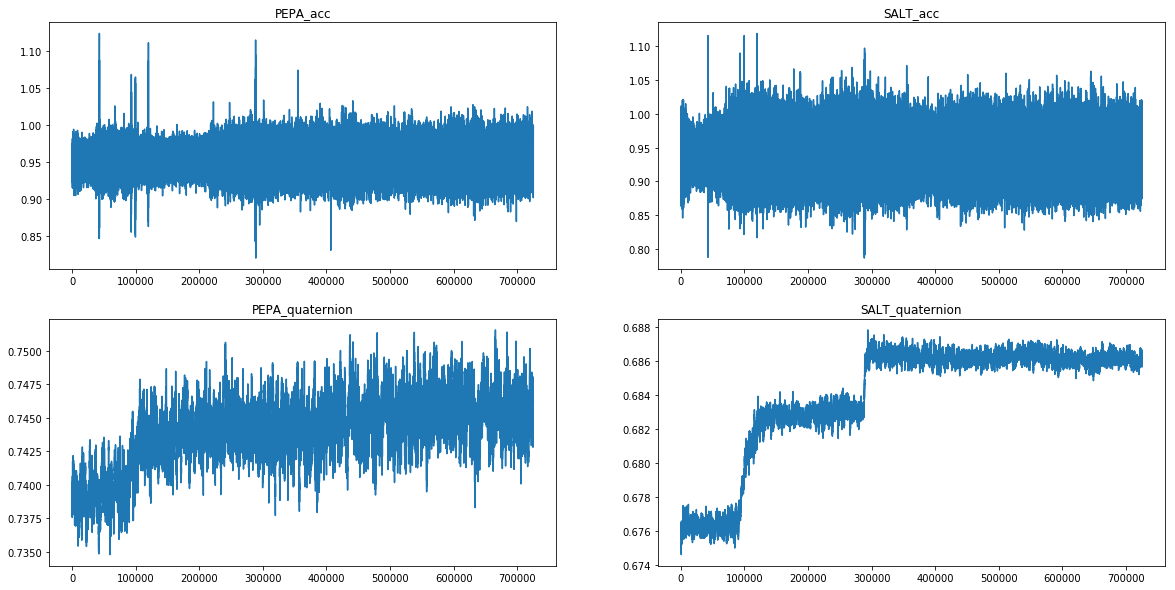

In [673]:
df['squares'] =  df['vals'].apply(lambda x: x[0] ** 2) + df['vals'].apply(lambda x: x[1] ** 2) + df['vals'].apply(lambda x: x[2] ** 2)

plt.figure(figsize=(20, 10))

ax0 = plt.subplot(221)        
ax0.plot(df[df['event'] == 'NGIMU-PEPA.acceleration']['squares'])
ax0.set_title('PEPA_acc')

ax1 = plt.subplot(222)
ax1.plot(df[df['event'] == 'NGIMU-SALT.acceleration']['squares'])
ax1.set_title('SALT_acc')

ax2 = plt.subplot(223)
ax2.plot(df[df['event'] == 'NGIMU-PEPA.quaternion']['squares'])
ax2.set_title('PEPA_quaternion')

ax3 = plt.subplot(224)
ax3.plot(df[df['event'] == 'NGIMU-SALT.quaternion']['squares'])
ax3.set_title('SALT_quaternion')

plt.show()

NGIMU-PEPA.quaternion


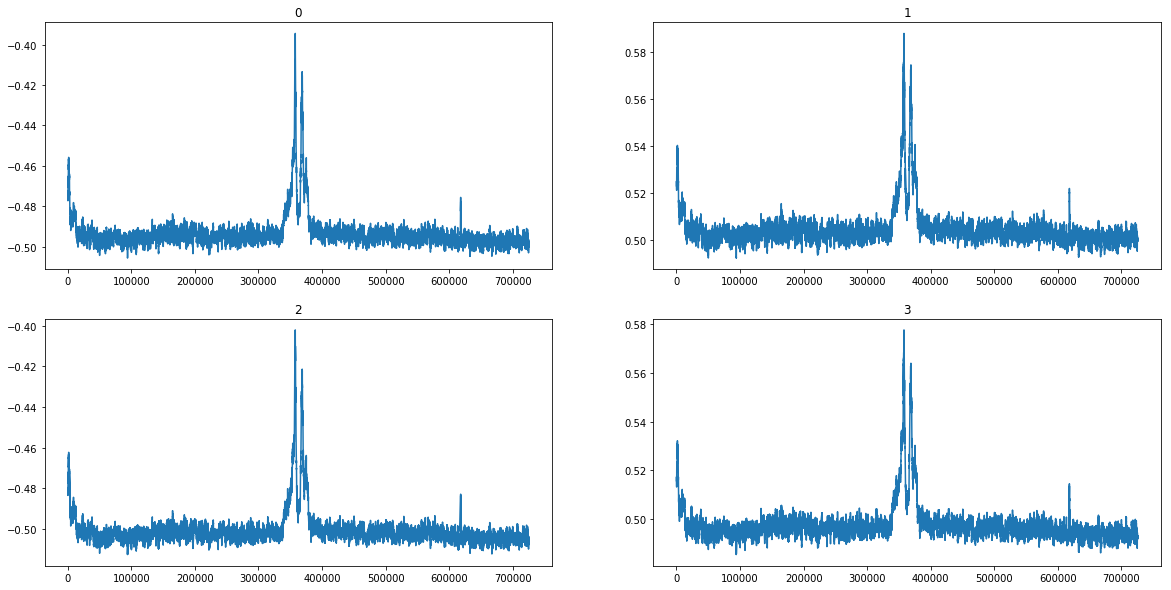

NGIMU-SALT.quaternion


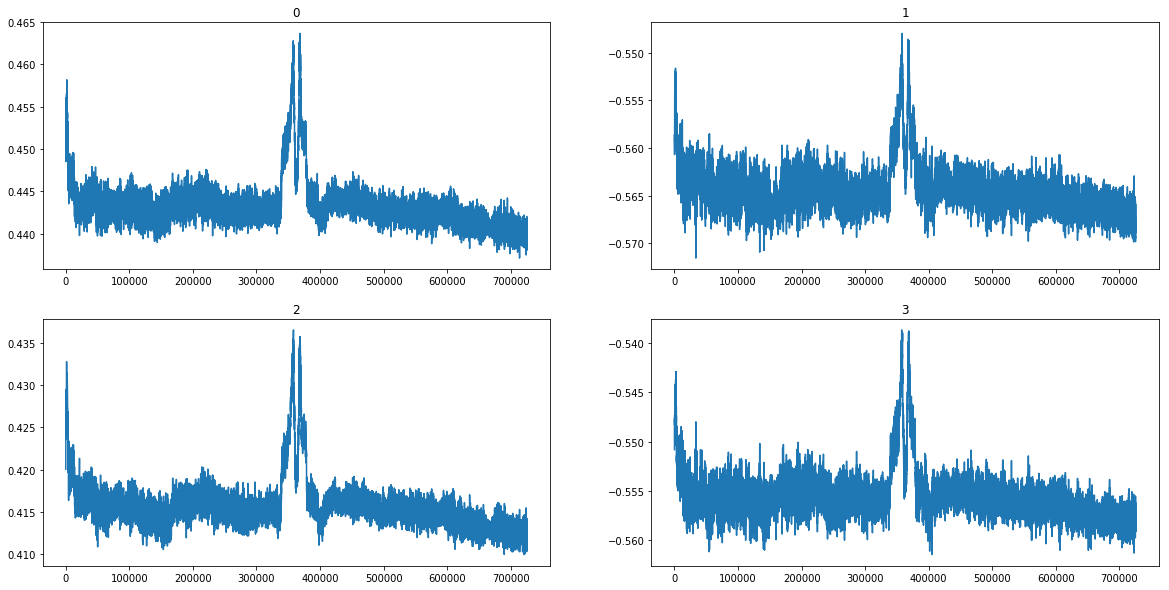

NGIMU-PEPA.acceleration


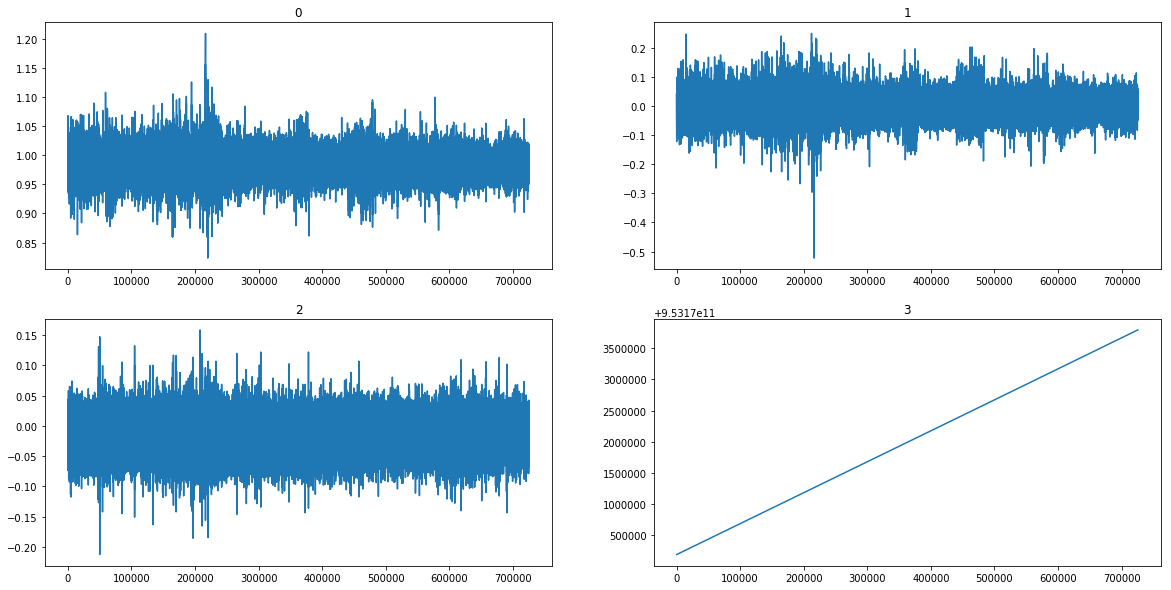

NGIMU-SALT.acceleration


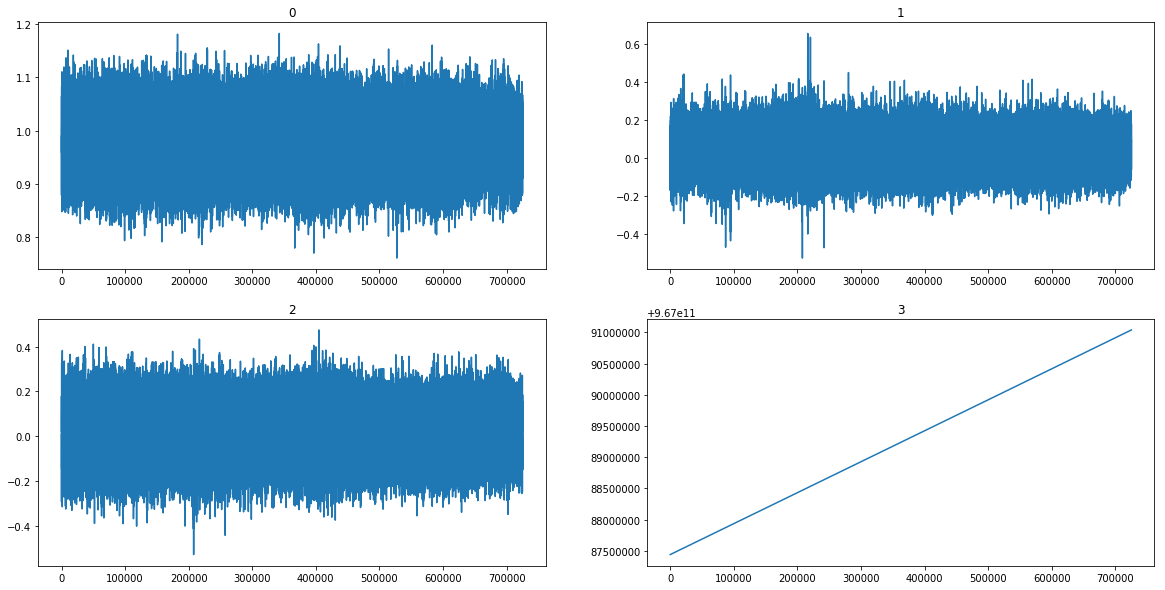

NGIMU-PEPA.battery


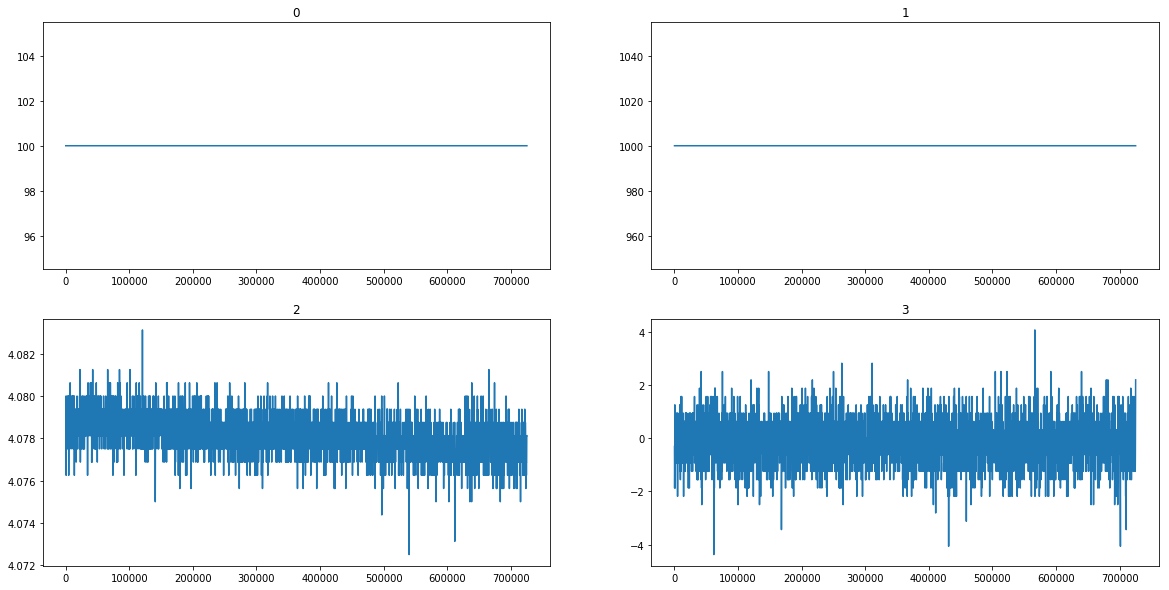

NGIMU-SALT.battery


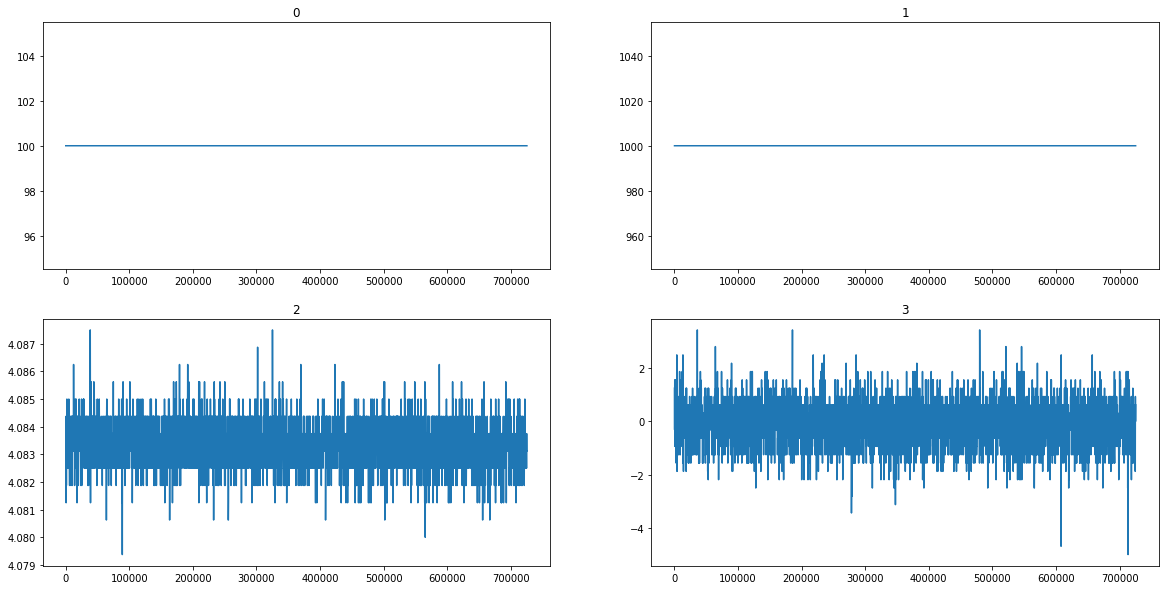

In [674]:
df = read_fearutes('2nd_task_data/DataLocation2/IHearVoicesData/Motion/20181023_0800.json')
print('NGIMU-PEPA.quaternion')
show_feature('NGIMU-PEPA.quaternion')
print('NGIMU-SALT.quaternion')
show_feature('NGIMU-SALT.quaternion')
print('NGIMU-PEPA.acceleration')
show_feature('NGIMU-PEPA.acceleration')
print('NGIMU-SALT.acceleration')
show_feature('NGIMU-SALT.acceleration')
print('NGIMU-PEPA.battery')
show_feature('NGIMU-SALT.battery', size=4)
print('NGIMU-SALT.battery')
show_feature('NGIMU-PEPA.battery', size=4)

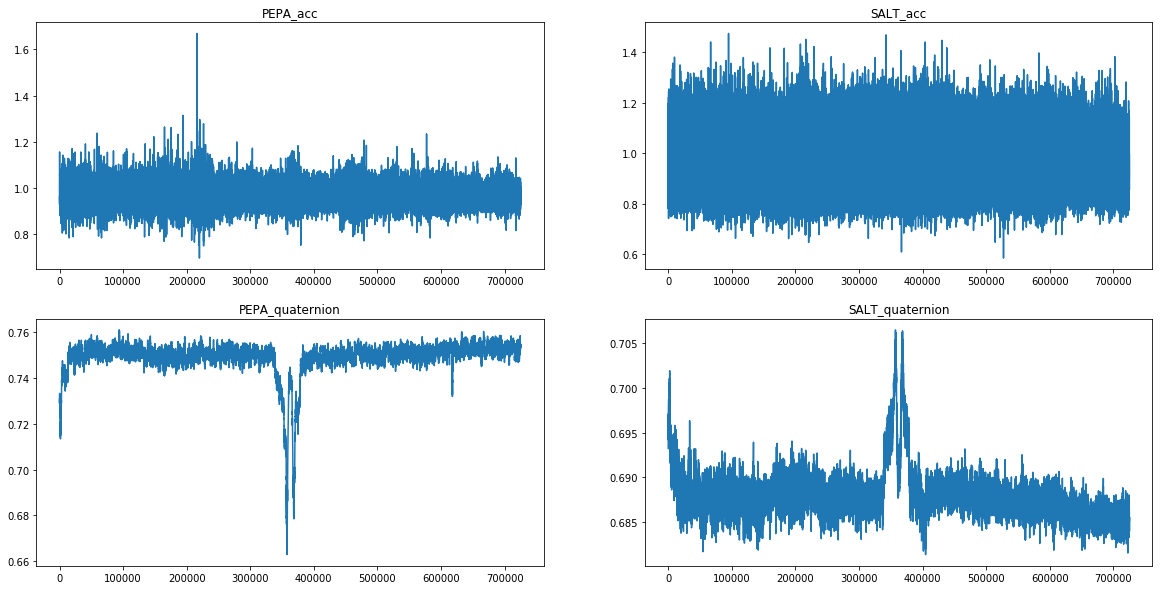

In [676]:
df['squares'] =  df['vals'].apply(lambda x: x[0] ** 2) + df['vals'].apply(lambda x: x[1] ** 2) + df['vals'].apply(lambda x: x[2] ** 2)

plt.figure(figsize=(20, 10))

ax0 = plt.subplot(221)        
ax0.plot(df[df['event'] == 'NGIMU-PEPA.acceleration']['squares'])
ax0.set_title('PEPA_acc')

ax1 = plt.subplot(222)
ax1.plot(df[df['event'] == 'NGIMU-SALT.acceleration']['squares'])
ax1.set_title('SALT_acc')

ax2 = plt.subplot(223)
ax2.plot(df[df['event'] == 'NGIMU-PEPA.quaternion']['squares'])
ax2.set_title('PEPA_quaternion')

ax3 = plt.subplot(224)
ax3.plot(df[df['event'] == 'NGIMU-SALT.quaternion']['squares'])
ax3.set_title('SALT_quaternion')

plt.show()

NGIMU-PEPA.quaternion


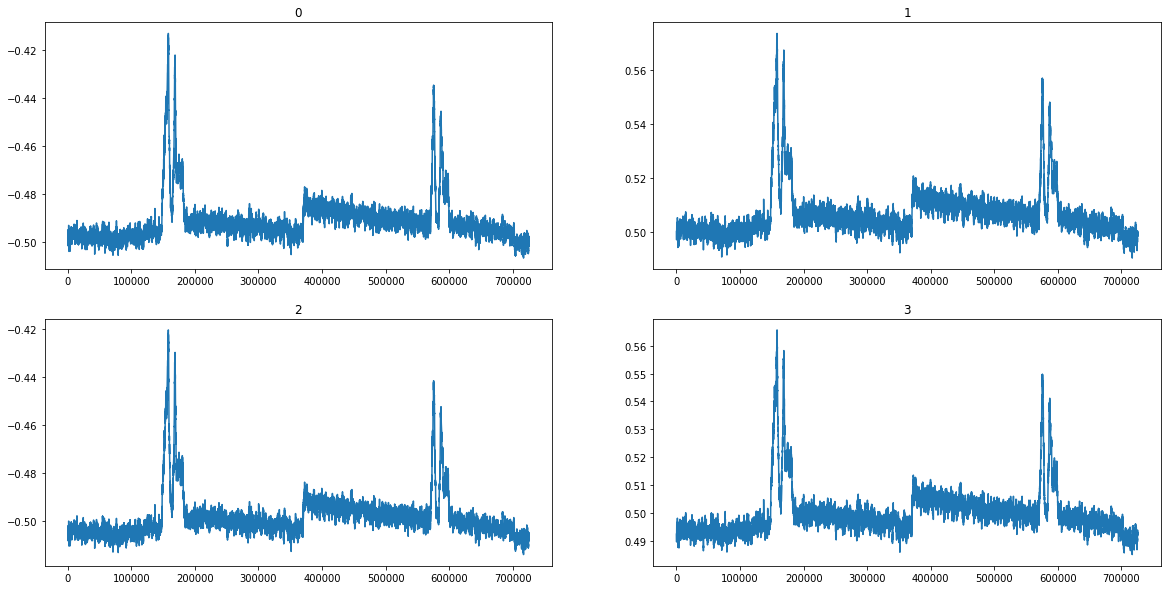

NGIMU-SALT.quaternion


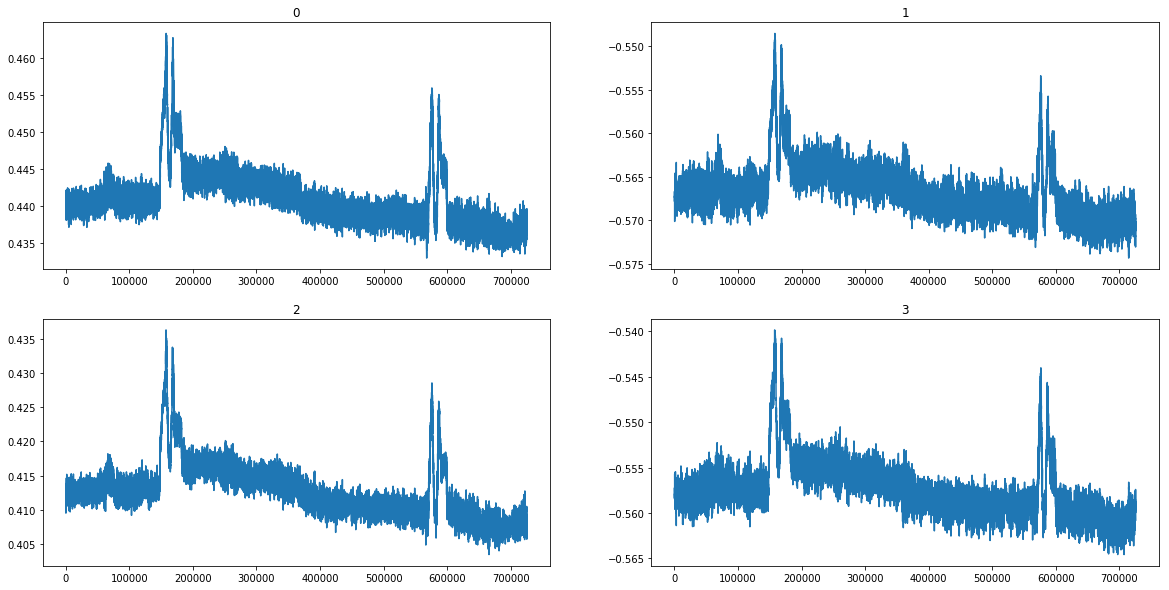

NGIMU-PEPA.acceleration


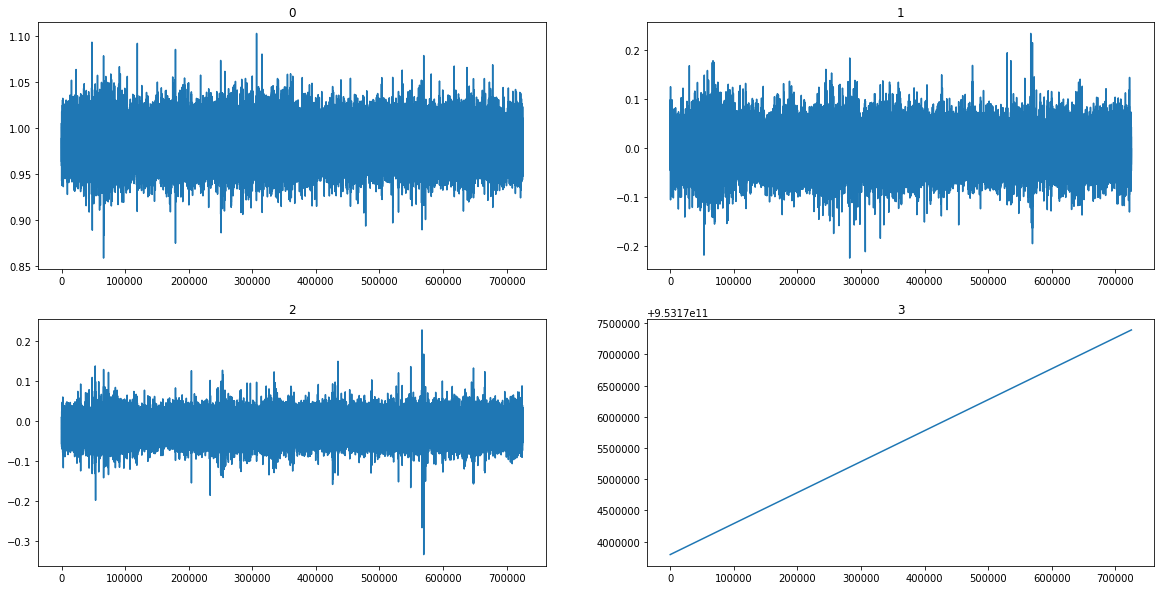

NGIMU-SALT.acceleration


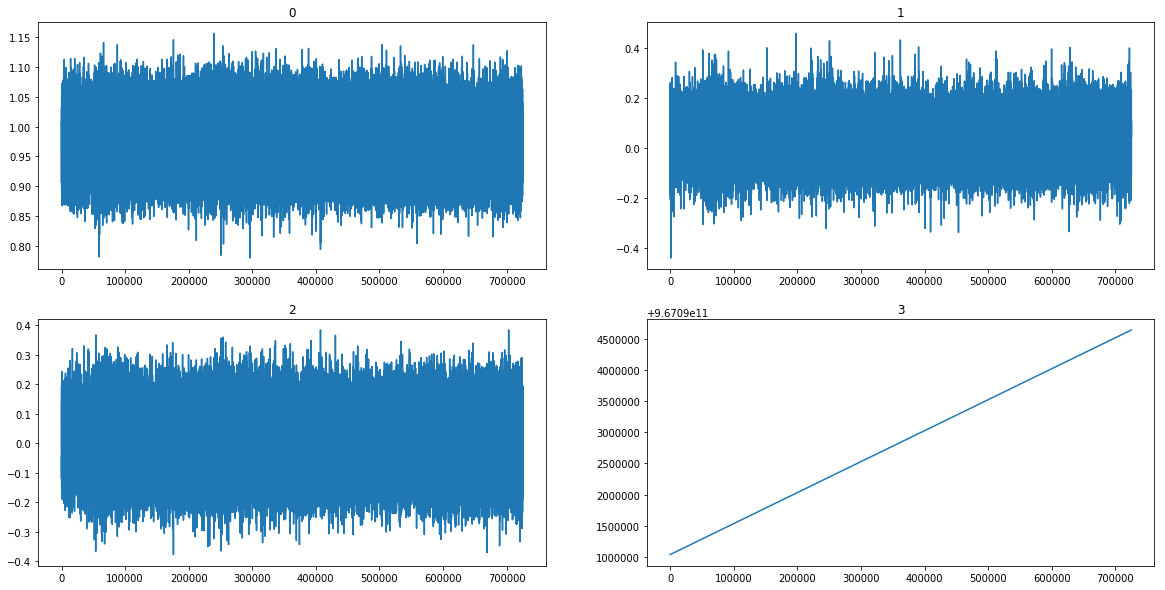

NGIMU-PEPA.battery


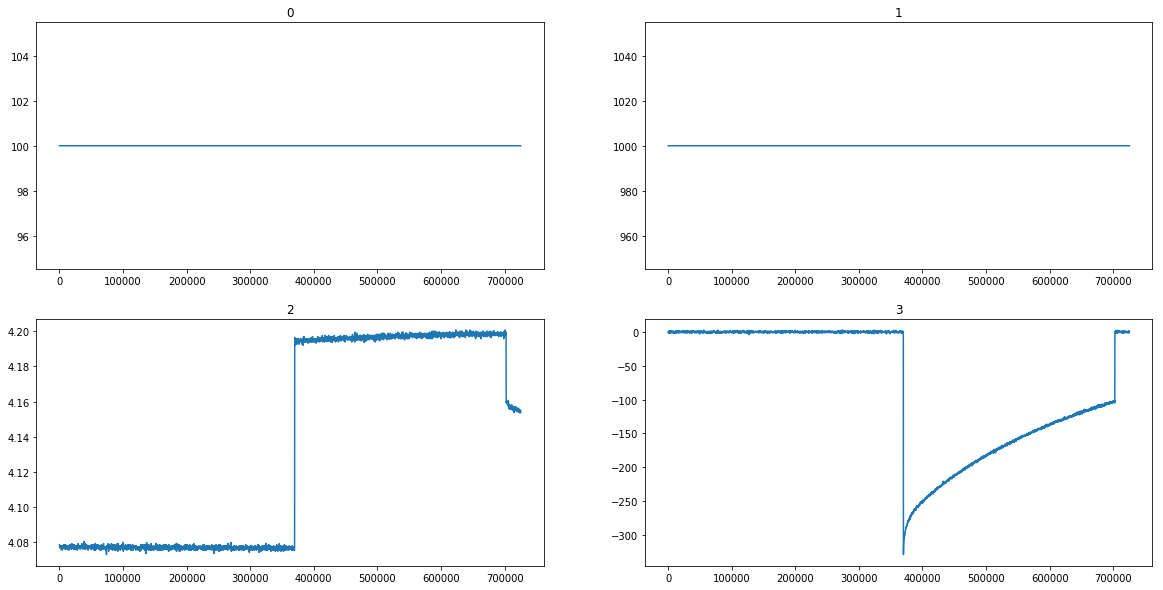

NGIMU-SALT.battery


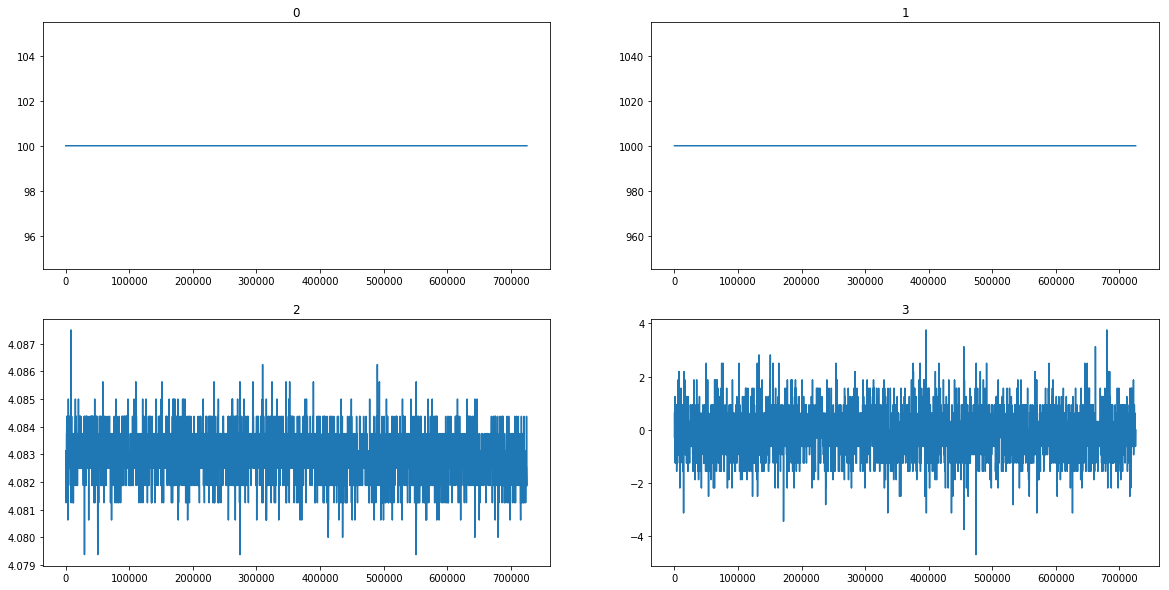

In [677]:
df = read_fearutes('2nd_task_data/DataLocation2/IHearVoicesData/Motion/20181023_0900.json')
print('NGIMU-PEPA.quaternion')
show_feature('NGIMU-PEPA.quaternion')
print('NGIMU-SALT.quaternion')
show_feature('NGIMU-SALT.quaternion')
print('NGIMU-PEPA.acceleration')
show_feature('NGIMU-PEPA.acceleration')
print('NGIMU-SALT.acceleration')
show_feature('NGIMU-SALT.acceleration')
print('NGIMU-PEPA.battery')
show_feature('NGIMU-SALT.battery', size=4)
print('NGIMU-SALT.battery')
show_feature('NGIMU-PEPA.battery', size=4)

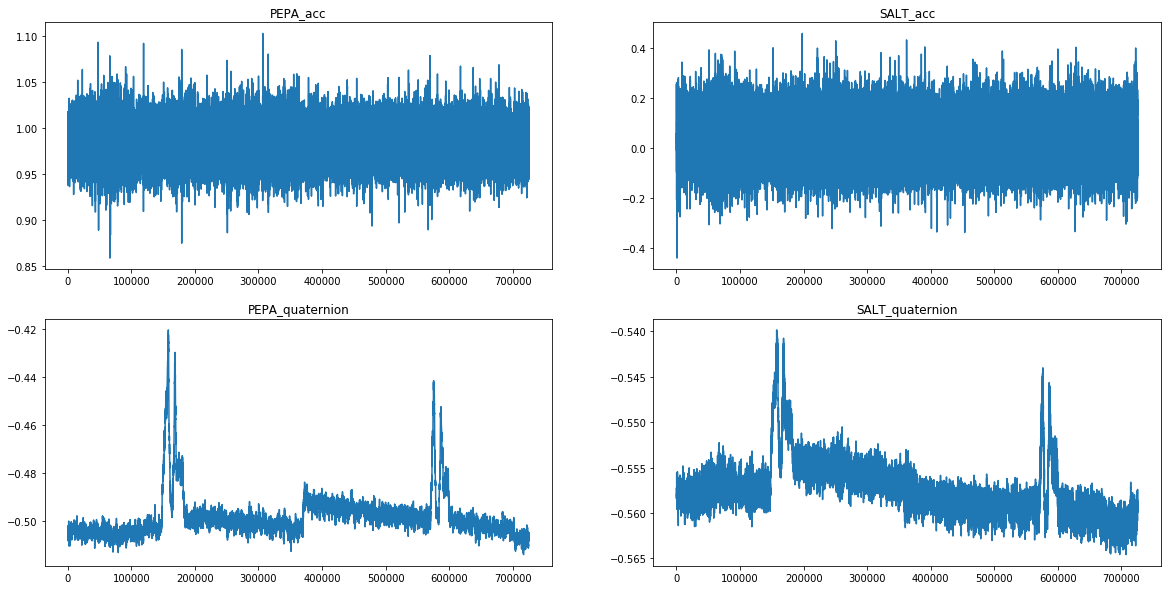

In [678]:
df['squares'] =  df['vals'].apply(lambda x: x[0] ** 2) + df['vals'].apply(lambda x: x[1] ** 2) + df['vals'].apply(lambda x: x[2] ** 2)

plt.figure(figsize=(20, 10))

ax0 = plt.subplot(221)        
ax0.plot(df[df['event'] == 'NGIMU-PEPA.acceleration']['vals'].apply(lambda x: x[0]))
ax0.set_title('PEPA_acc')

ax1 = plt.subplot(222)
ax1.plot(df[df['event'] == 'NGIMU-SALT.acceleration']['vals'].apply(lambda x: x[1]))
ax1.set_title('SALT_acc')

ax2 = plt.subplot(223)
ax2.plot(df[df['event'] == 'NGIMU-PEPA.quaternion']['vals'].apply(lambda x: x[2]))
ax2.set_title('PEPA_quaternion')

ax3 = plt.subplot(224)
ax3.plot(df[df['event'] == 'NGIMU-SALT.quaternion']['vals'].apply(lambda x: x[3]))
ax3.set_title('SALT_quaternion')

plt.show()

NGIMU-PEPA.quaternion


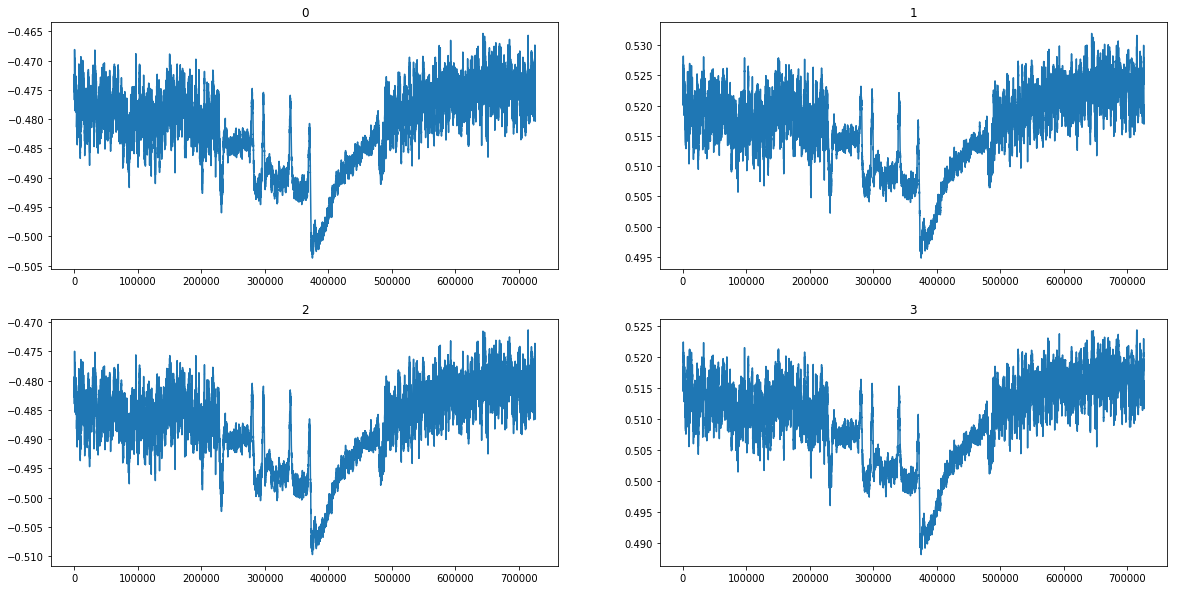

NGIMU-SALT.quaternion


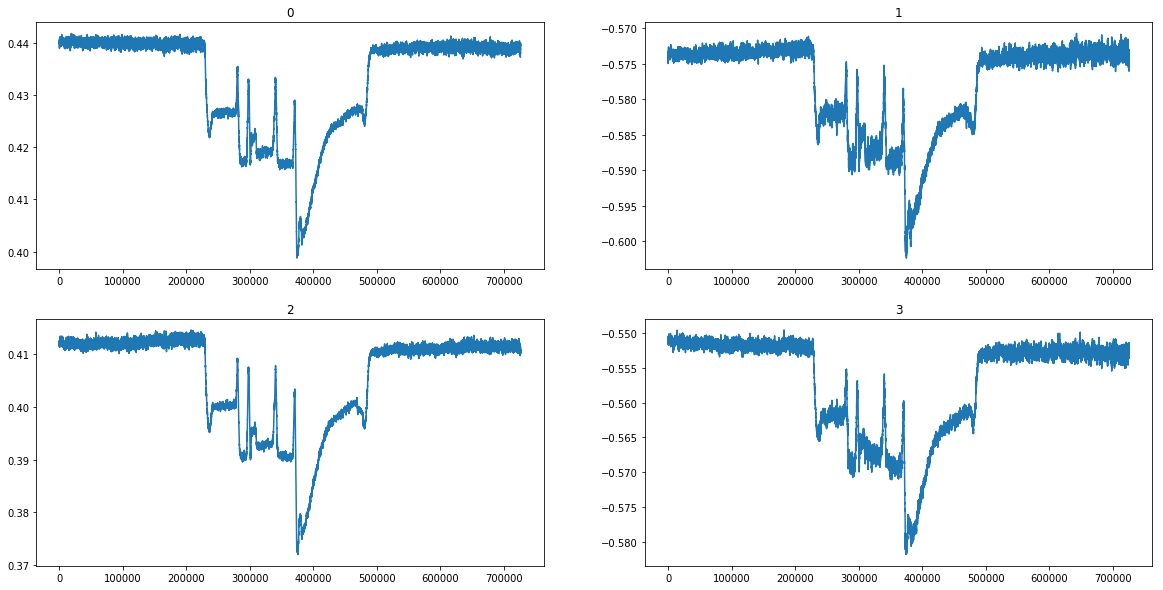

NGIMU-PEPA.acceleration


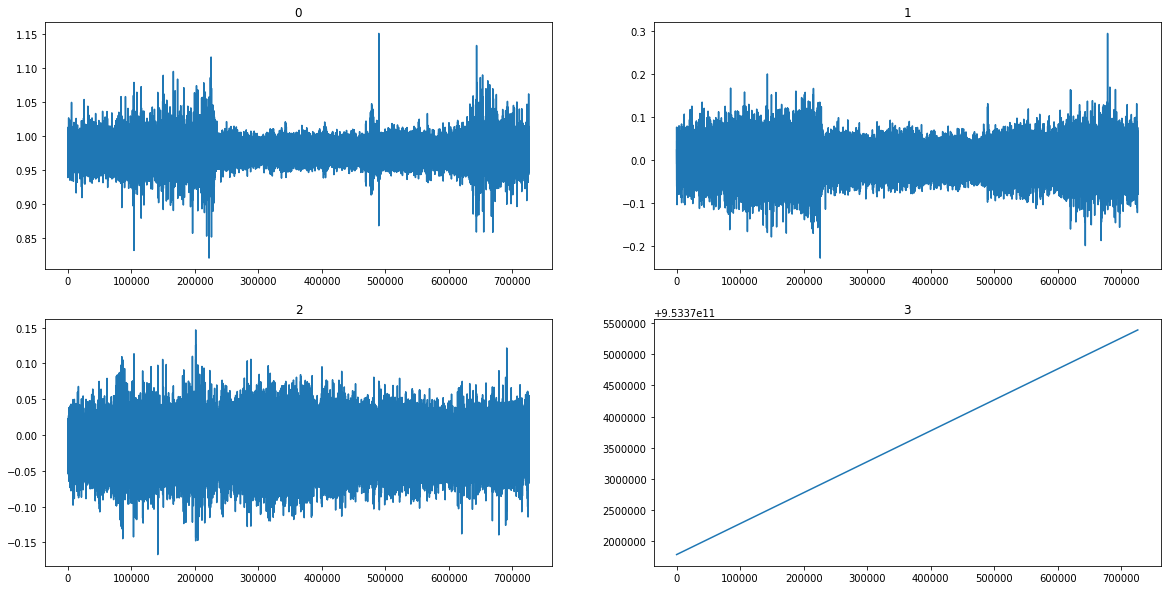

NGIMU-SALT.acceleration


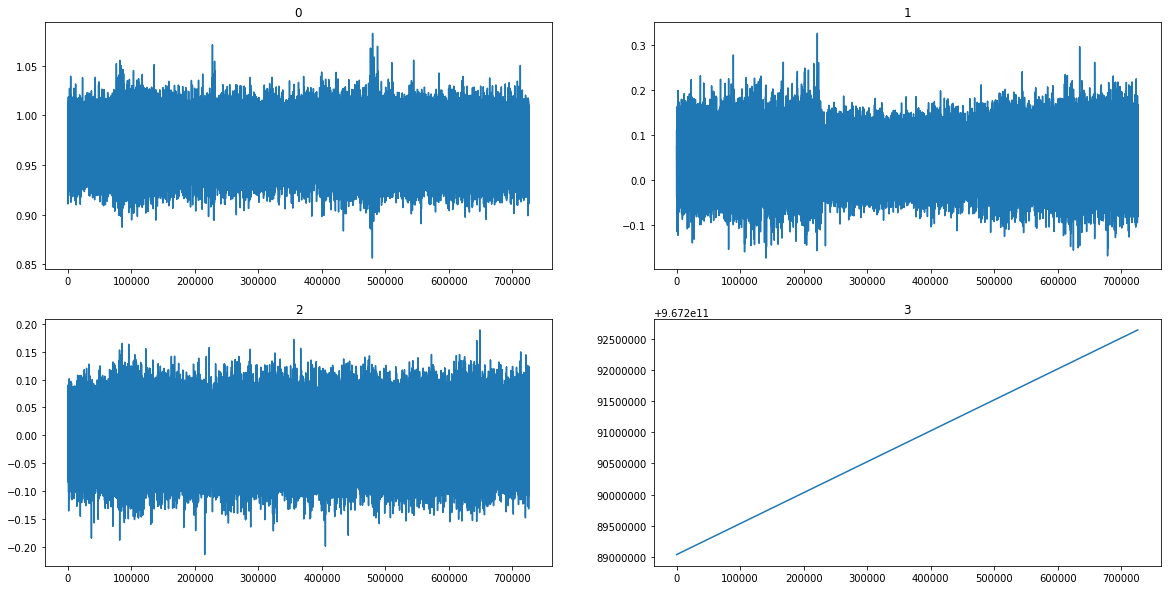

NGIMU-PEPA.battery


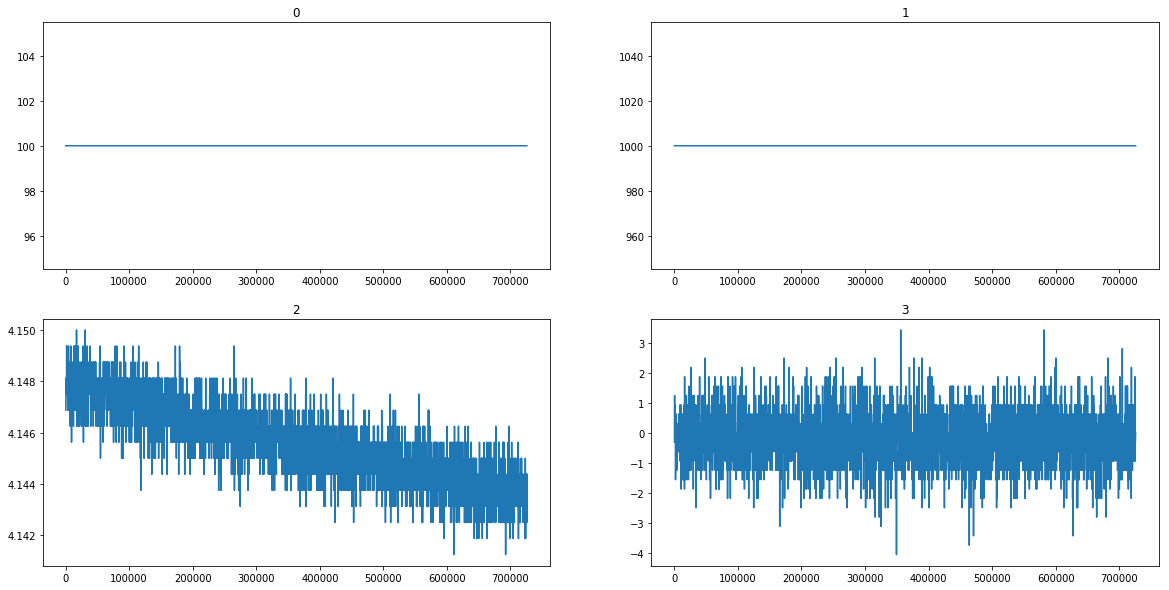

NGIMU-SALT.battery


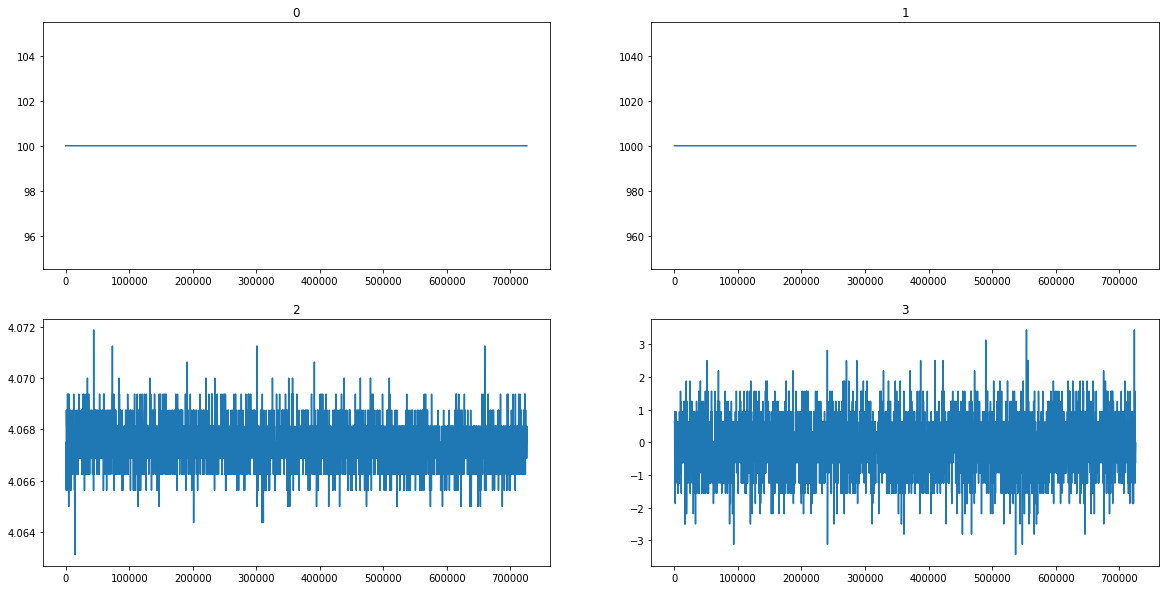

In [679]:
df = read_fearutes('2nd_task_data/DataLocation2/IHearVoicesData/Motion/20181025_1600.json')

print('NGIMU-PEPA.quaternion')
show_feature('NGIMU-PEPA.quaternion')
print('NGIMU-SALT.quaternion')
show_feature('NGIMU-SALT.quaternion')
print('NGIMU-PEPA.acceleration')
show_feature('NGIMU-PEPA.acceleration')
print('NGIMU-SALT.acceleration')
show_feature('NGIMU-SALT.acceleration')
print('NGIMU-PEPA.battery')
show_feature('NGIMU-SALT.battery', size=4)
print('NGIMU-SALT.battery')
show_feature('NGIMU-PEPA.battery', size=4)